In [ ]:
%pip install datasets

In [ ]:
dbutils.library.restartPython() 

In [ ]:
from datasets import load_dataset , Dataset, concatenate_datasets 
import numpy as np
import pandas as pd
import random

In [ ]:
rd_ds = load_dataset("xiyuez/red-dot-design-award-product-description")
rd_df = pd.DataFrame(rd_ds['train'])


In [ ]:

rd_df_sample = rd_df.sample(n=5000, random_state=42)
display(rd_df_sample)

#### Image of output (forgot to clean output editing after the export)
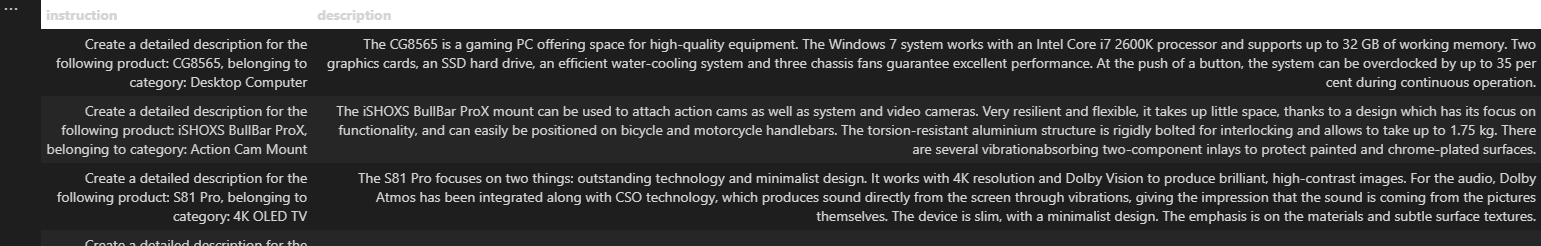


In [ ]:
template = """Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
{}

### Response:\n"""

# COMMAND ----------

rd_df_sample['prompt'] = rd_df_sample["instruction"].apply(lambda x: template.format(x))

In [ ]:
rd_df_sample.rename(columns={'description': 'response'}, inplace=True)


In [ ]:
rd_df_sample['response'] = rd_df_sample['response'] +  "\n### End"
rd_df_sample = rd_df_sample[['prompt', 'response']]
display(rd_df_sample)

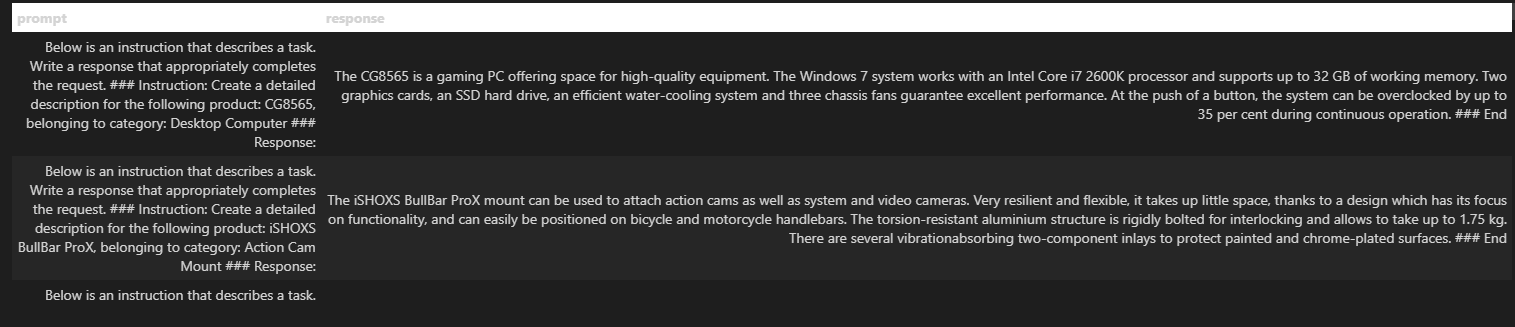

In [ ]:

%sql
CREATE DATABASE IF NOT EXISTS description_generator;
USE description_generator;
      

In [ ]:
spark.createDataFrame(rd_df_sample).write.saveAsTable('product_name_to_description')